In [53]:
import csv
from datetime import *

In [220]:
intersections = {"\'apeg267\'": "2nd (SB only) and Blanchard", "\'apeg263\'": "1st and Lenora"}
week = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

import matplotlib.pyplot as plt

valnames = {"\'apeg267\'": "2nd and Blanchard", "\'apeg263\'": "1st and Lenora"}


In [251]:
infile = open("../data/congestion/broad_to_stewart.csv", "r")
print(infile.readline())
lines = infile.readlines()
delays = {}
delays["dates"] = []
delays["best"] = []
delays["avg"] = []
delays["worst"] = []
for l in lines:
    line = l.strip().split(",")
    dt = datetime.strptime(line[0], "%Y-%m-%d %H:%M:%S")
    ndt = datetime(year=2016, month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)
    delays["dates"].append(ndt)
    delays["best"].append(float(line[1]))
    delays["avg"].append(float(line[2]))
    delays["worst"].append(float(line[3]))
    
    
infile.close()
    

,optimistic_time,best_guess_time,pessimistic_time



In [246]:
dates = sorted(delays["dates"])
dates.index(datetime(year=2016, month=5, day=28, hour=23, minute=45, second=0))

2687

In [252]:
delays_old = np.array(delays["worst"])

In [253]:
delays_new - delays_old

array([ 31.,   7.,  10., ...,  20.,   0.,  -3.])

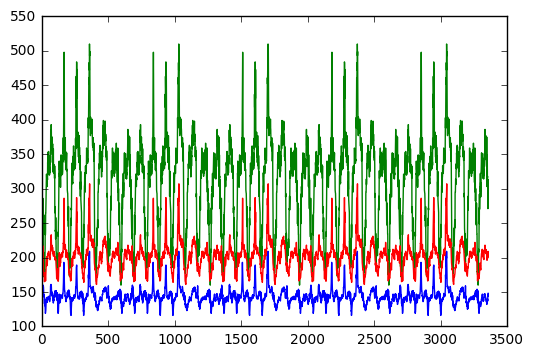

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(delays["best"])
plt.plot(delays["worst"])
plt.plot(delays["avg"])

In [233]:
delays.keys()

['dates', 'avg', 'worst', 'best']

In [235]:
#read traffic volume, match day of week and hour and 15 minute block to 15 minute total volume
import numpy as np

volumes = {}
for i in ["1","2","3","4","5"]:
    with open("../data/congestion/Traffic.BARHAM_BELLTOWN-" + i + ".csv", "r") as f:
        lines = f.readlines()
        road = ""
        for line in lines:
            if line[0:7] == "Results":
                tok_1 = line.split(",")
                tok_2 = tok_1[0].split(" ")
                road = tok_2[-1]
                direction = tok_2[4]
                if road not in volumes.keys():
                    volumes[road] = {}
                if direction not in volumes[road].keys():
                    volumes[road][direction] = {}
                    volumes[road][direction]["dates"] = []
                    volumes[road][direction]["vol"] = []
            if line[0:1] == "0":
                tokens = line.strip().split(",")
                dt = datetime.strptime(tokens[0].rstrip(" PDT"), "%m/%d/%Y %H:%M:%S")
                try:
                    vol = float(tokens[2])
                except:
                    vol = np.nan
                volumes[road][direction]["dates"].append(dt)
                volumes[road][direction]["vol"].append(vol)
            
#volumes[road]["lanetotal"]["dates"] = []
#volumes[road]["lanetotal"]["vol"] = []

intersections = volumes.keys()
directions = {}
for road in intersections:
    directions[road] = volumes[road].keys()

for road in intersections:
    for direction in directions[road]:
        cardinal = direction.split("_")[0].lstrip("\'")
        if cardinal not in volumes[road].keys():
            volumes[road]["cardinals"] = set()
            volumes[road][cardinal] = {}
            volumes[road][cardinal]["dates"] = []
            volumes[road][cardinal]["vol"] = []
            volumes[road][cardinal]["lanes"] = set()
        volumes[road][cardinal]["lanes"].add(direction)
        volumes[road]["cardinals"].add(cardinal)
        
for road in intersections:
    for cardinal in volumes[road]["cardinals"]:
        vols = []
        for lane in volumes[road][cardinal]["lanes"]:
            vols.append(volumes[road][lane]["vol"])
        vols = np.sum(np.asarray(vols), axis = 0)
        volumes[road][cardinal]["vol"] = vols
        volumes[road][cardinal]["dates"] = volumes[road][lane]["dates"]
            
    

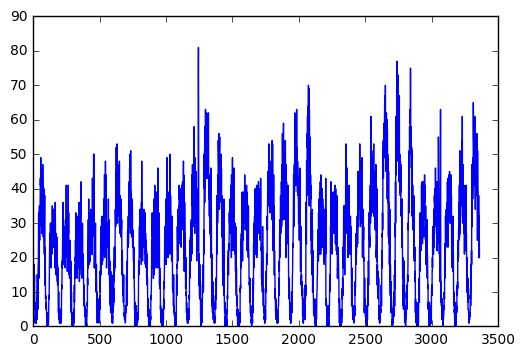

In [240]:
plt.plot(volumes[road][lane]['vol'])

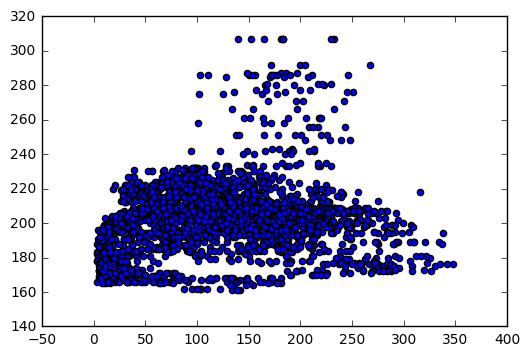

In [226]:
road = "\'apeg267\'"
status = "avg"
vols = volumes[road]["4"]["vol"]
dates = volumes[road]["4"]["dates"]

data = np.zeros((len(dates), 2))
for i in range(len(dates)):
    dateindex = delays["dates"].index(dates[i])
    data[i,0] = vols[i,]
    data[i,1] = delays[status][dateindex]


plt.scatter(data[:,0], data[:,1])

#take saturday out of it

In [227]:
dayofweek = 3

In [228]:
avgvols = {}
status = "best"
for i in range(len(dates)):
    #if dates[i].weekday() == dayofweek:
    h = dates[i].hour
    m = dates[i].minute
    if h not in avgvols.keys():
        avgvols[h] = {}
    if m not in avgvols[h].keys():
        avgvols[h][m] = {}
        avgvols[h][m]["delay"] = []
        avgvols[h][m]["vol"] = []
    dateindex = delays["dates"].index(dates[i])
    avgvols[h][m]["delay"].append(delays[status][dateindex])
    avgvols[h][m]["vol"].append(vols[i,])

adbest = []
avbest = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adbest.append(np.nanmean(avgvols[h][m]["delay"]))
        avbest.append(np.nanmean(avgvols[h][m]["vol"]))

In [229]:
avgvols = {}
status = "worst"
for i in range(len(dates)):
    #if dates[i].weekday() == dayofweek:
    h = dates[i].hour
    m = dates[i].minute
    if h not in avgvols.keys():
        avgvols[h] = {}
    if m not in avgvols[h].keys():
        avgvols[h][m] = {}
        avgvols[h][m]["delay"] = []
        avgvols[h][m]["vol"] = []
    dateindex = delays["dates"].index(dates[i])
    avgvols[h][m]["delay"].append(delays[status][dateindex])
    avgvols[h][m]["vol"].append(vols[i,])

adworst = []
avworst = []

adaft = []
avaft = []

admorn = []
avmorn = []

adeve = []
aveve = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adworst.append(np.nanmean(avgvols[h][m]["delay"]))
        avworst.append(np.nanmean(avgvols[h][m]["vol"]))
        if h > 12 and h < 19:
            adaft.append(np.nanmean(avgvols[h][m]["delay"]))
            avaft.append(np.nanmean(avgvols[h][m]["vol"]))
        if h >= 19:
            adeve.append(np.nanmean(avgvols[h][m]["delay"]))
            aveve.append(np.nanmean(avgvols[h][m]["vol"]))
        if h <= 12:
            admorn.append(np.nanmean(avgvols[h][m]["delay"]))
            avmorn.append(np.nanmean(avgvols[h][m]["vol"]))

In [230]:
avgvols = {}
status = "avg"
for i in range(len(dates)):
    #if dates[i].weekday() == dayofweek:   
    h = dates[i].hour
    m = dates[i].minute
    if h not in avgvols.keys():
        avgvols[h] = {}
    if m not in avgvols[h].keys():
        avgvols[h][m] = {}
        avgvols[h][m]["delay"] = []
        avgvols[h][m]["vol"] = []
    dateindex = delays["dates"].index(dates[i])
    avgvols[h][m]["delay"].append(delays[status][dateindex])
    avgvols[h][m]["vol"].append(vols[i,])

adavg = []
avavg = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adavg.append(np.nanmean(avgvols[h][m]["delay"]))
        avavg.append(np.nanmean(avgvols[h][m]["vol"]))

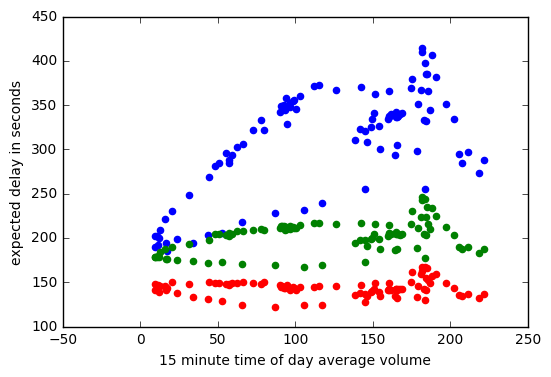

In [231]:
plt.scatter(np.array(avworst), adworst, color='blue')
plt.scatter(np.array(avbest), adbest, color="red")
plt.scatter(np.array(avavg), adavg, color="green")
plt.xlabel("15 minute time of day average volume")
plt.ylabel("expected delay in seconds")

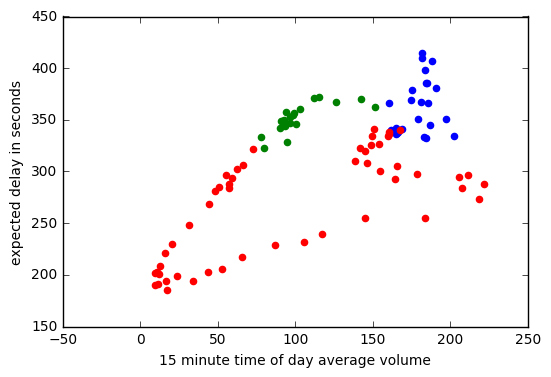

In [232]:
plt.scatter(np.array(avaft), adaft, color='blue')
plt.scatter(np.array(avmorn), admorn, color="red")
plt.scatter(np.array(aveve), adeve, color="green")
plt.xlabel("15 minute time of day average volume")
plt.ylabel("expected delay in seconds")
plt.show()

In [85]:
def exponential(m, c, x):
    ret =  np.exp(c) * np.exp(m * x)
    return(ret)

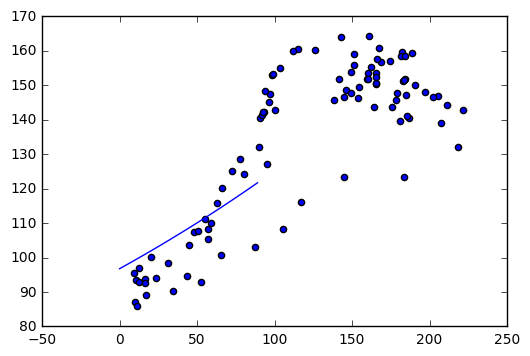

In [86]:
import numpy as np

x = np.array(avworst)
y = np.array(np.log(adworst))

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

xaxis = [ i for i in range(90) ]
yfit = [ exponential(m, c, i) for i in range(90) ]

plt.plot(xaxis, yfit)
plt.scatter(avworst, adworst)

In [19]:
yfit

[96.758469337764026,
 97.008181276803171,
 97.258537666430712,
 97.509540169829322,
 97.761190454473905,
 98.013490192142797,
 98.266441058928805,
 98.520044735250323,
 98.774302905862584,
 99.029217259868759,
 99.284789490731214,
 99.541021296282807,
 99.797914378738085,
 100.0554704447046,
 100.31369120519435,
 100.57257837563499,
 100.83213367588139,
 101.09235883022694,
 101.35325556741503,
 101.61482562065056,
 101.87707072761148,
 102.13999263046027,
 102.40359307585548,
 102.66787381496353,
 102.93283660347011,
 103.19848320159193,
 103.46481537408847,
 103.73183489027367,
 103.99954352402764,
 104.26794305380848,
 104.53703526266413,
 104.8068219382441,
 105.0773048728115,
 105.34848586325485,
 105.62036671109999,
 105.89294922252219,
 106.16623520835793,
 106.44022648411718,
 106.71492486999522,
 106.99033219088493,
 107.26645027638878,
 107.54328096083108,
 107.82082608327009,
 108.09908748751026,
 108.37806702211449,
 108.65776654041643,
 108.93818790053275,
 109.21933296537

In [46]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, np.power(r_value,2), p_value, std_err)

(0.11019141260865373, 128.82399120603185, 0.20050382883907375, 4.7756805850953785e-06, 0.02269502590020096)


In [35]:
#find times that volume is high and worst case travel time is dropping
dates[i].weekday()

5

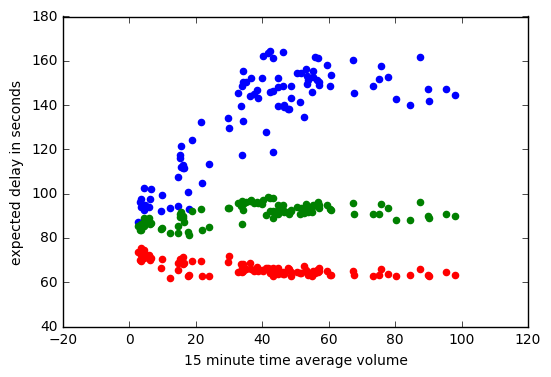

In [96]:
avgvols = {}
status = "best"
for i in range(len(dates)):
    if dates[i].weekday() < 5:
        h = dates[i].hour
        m = dates[i].minute
        if h not in avgvols.keys():
            avgvols[h] = {}
        if m not in avgvols[h].keys():
            avgvols[h][m] = {}
            avgvols[h][m]["delay"] = []
            avgvols[h][m]["vol"] = []
        dateindex = delays["dates"].index(dates[i])
        avgvols[h][m]["delay"].append(delays[status][dateindex])
        avgvols[h][m]["vol"].append(vols[i,])

adbest = []
avbest = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adbest.append(np.nanmean(avgvols[h][m]["delay"]))
        avbest.append(np.nanmean(avgvols[h][m]["vol"]))

avgvols = {}
status = "worst"
for i in range(len(dates)):
    if dates[i].weekday() < 5:
        h = dates[i].hour
        m = dates[i].minute
        if h not in avgvols.keys():
            avgvols[h] = {}
        if m not in avgvols[h].keys():
            avgvols[h][m] = {}
            avgvols[h][m]["delay"] = []
            avgvols[h][m]["vol"] = []
        dateindex = delays["dates"].index(dates[i])
        avgvols[h][m]["delay"].append(delays[status][dateindex])
        avgvols[h][m]["vol"].append(vols[i,])

adworst = []
avworst = []

adaft = []
avaft = []

admorn = []
avmorn = []

adeve = []
aveve = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adworst.append(np.nanmean(avgvols[h][m]["delay"]))
        avworst.append(np.nanmean(avgvols[h][m]["vol"]))
        if h > 12 and h < 19:
            adaft.append(np.nanmean(avgvols[h][m]["delay"]))
            avaft.append(np.nanmean(avgvols[h][m]["vol"]))
        if h >= 19:
            adeve.append(np.nanmean(avgvols[h][m]["delay"]))
            aveve.append(np.nanmean(avgvols[h][m]["vol"]))
        if h <= 12:
            admorn.append(np.nanmean(avgvols[h][m]["delay"]))
            avmorn.append(np.nanmean(avgvols[h][m]["vol"]))

avgvols = {}
status = "avg"
for i in range(len(dates)):
    if dates[i].weekday() < 5:
        h = dates[i].hour
        m = dates[i].minute
        if h not in avgvols.keys():
            avgvols[h] = {}
        if m not in avgvols[h].keys():
            avgvols[h][m] = {}
            avgvols[h][m]["delay"] = []
            avgvols[h][m]["vol"] = []
        dateindex = delays["dates"].index(dates[i])
        avgvols[h][m]["delay"].append(delays[status][dateindex])
        avgvols[h][m]["vol"].append(vols[i,])

adavg = []
avavg = []
for h in avgvols.keys():
    for m in avgvols[h].keys():
        adavg.append(np.nanmean(avgvols[h][m]["delay"]))
        avavg.append(np.nanmean(avgvols[h][m]["vol"]))
        
plt.scatter(avworst, adworst, color='blue')
plt.scatter(avbest, adbest, color="red")
plt.scatter(avavg, adavg, color="green")
plt.xlabel("15 minute time average volume")
plt.ylabel("expected delay in seconds")

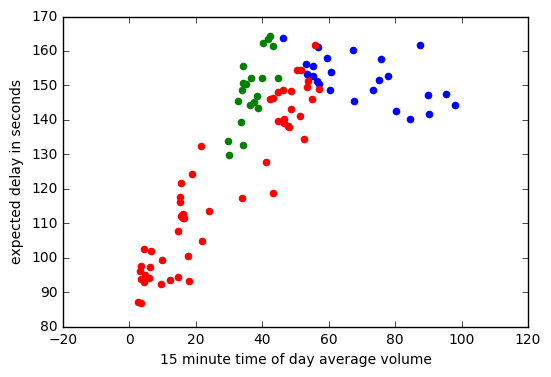

In [97]:
plt.scatter(np.array(avaft), adaft, color='blue')
plt.scatter(np.array(avmorn), admorn, color="red")
plt.scatter(np.array(aveve), adeve, color="green")
plt.xlabel("15 minute time of day average volume")
plt.ylabel("expected delay in seconds")